In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df=pd.read_csv("housing.csv")

# understaning data

In [85]:
df.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3240,-119.56,36.09,14.0,1267.0,290.0,1077.0,279.0,1.8500,52300.0,INLAND
2297,-119.76,36.81,19.0,4643.0,1429.0,4638.0,1335.0,1.2716,69400.0,INLAND
15831,-122.43,37.76,52.0,2332.0,434.0,861.0,406.0,4.4318,437500.0,NEAR BAY
13071,-121.31,38.57,9.0,2748.0,521.0,1663.0,565.0,3.5192,113300.0,INLAND
17164,-122.22,37.37,26.0,440.0,202.0,322.0,218.0,5.1831,350000.0,NEAR OCEAN
15960,-122.43,37.71,52.0,1508.0,278.0,1138.0,304.0,4.0234,266500.0,NEAR BAY
17920,-121.99,37.35,16.0,3249.0,947.0,1637.0,841.0,4.5427,198400.0,<1H OCEAN
6194,-117.90,34.08,32.0,2068.0,356.0,976.0,370.0,5.2120,201200.0,<1H OCEAN
10074,-120.10,39.33,9.0,2738.0,510.0,1193.0,412.0,4.3958,124800.0,INLAND
5320,-118.42,34.05,38.0,4888.0,1126.0,1698.0,937.0,4.8304,500001.0,<1H OCEAN


In [86]:
df.shape

(20640, 10)

### data have 20640 rows and 10 colums

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


##### Data contains all numeric columns except ocean_proximity

In [88]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

#### Only Total_bebrooms column has missing values

In [89]:
df.duplicated().sum()

np.int64(0)

EDA On Catagorical data

<Axes: xlabel='ocean_proximity', ylabel='Count'>

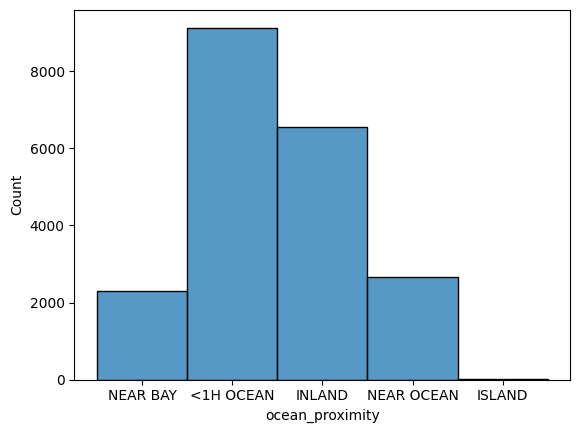

In [90]:
sns.histplot(df["ocean_proximity"])

MOST of the houses in california are 1 hour distance from the ocean and are inland

<Axes: ylabel='count'>

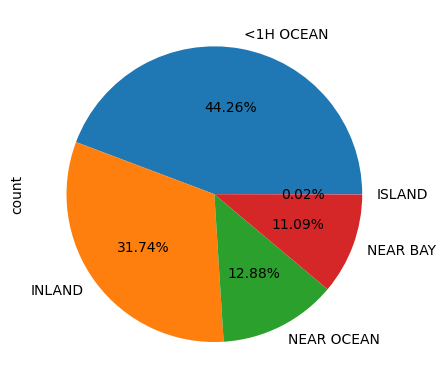

In [91]:
df["ocean_proximity"].value_counts().plot(kind='pie',autopct="%.2f%%")

we can say that less than 25% of the houses are near any waterbody, may be they are expensive need to check for it ?

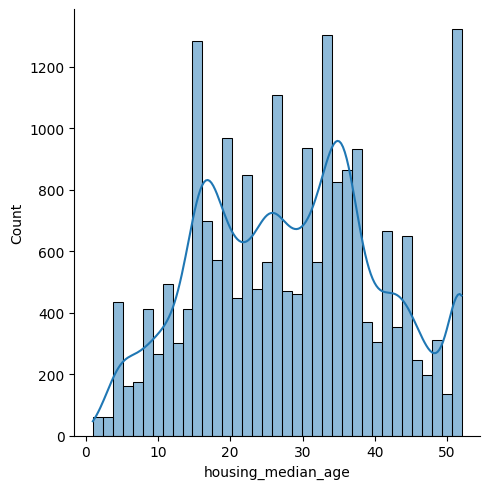

In [92]:
sns.displot(df["housing_median_age"],kde=True)

alot of house are in the range of median age of 20 to 38

<Axes: xlabel='median_income', ylabel='Count'>

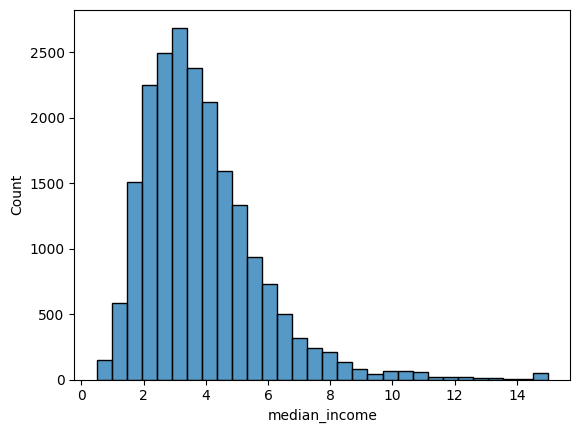

In [93]:
sns.histplot(df["median_income"],bins=30)

income disturbution is as expected the disturbution is right skewed might contain outliers

<Axes: xlabel='median_house_value', ylabel='Count'>

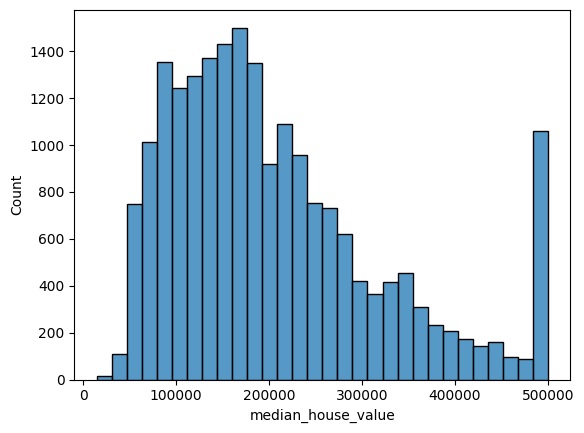

In [94]:
sns.histplot(df["median_house_value"],bins=30,)

the median house values are in the range of 100000$ to 300000$

<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

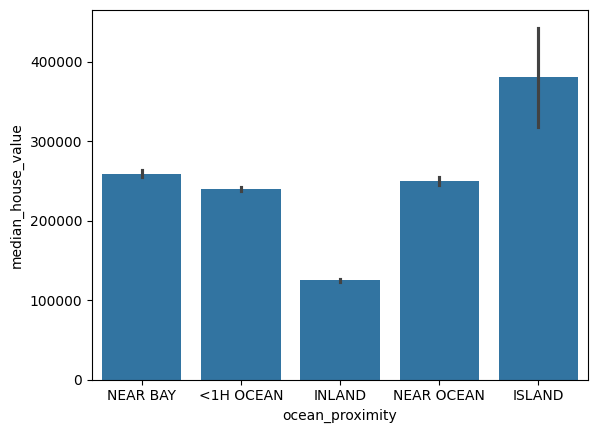

In [95]:
sns.barplot(y=df["median_house_value"],x=df["ocean_proximity"])

we got another insight that island house are expensive, but we have now some other insight that both near ocean or house that are  1 hour distance away have approximately same house value

<Axes: xlabel='ocean_proximity', ylabel='median_income'>

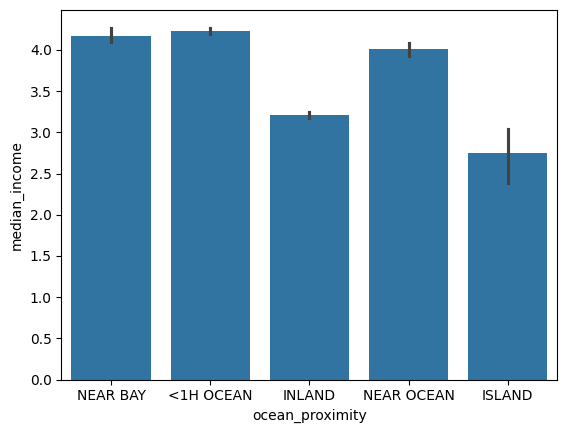

In [96]:
sns.barplot(y=df["median_income"],x=df["ocean_proximity"])

now we know that the income per block in people living within 1 hour distance is higher than others.

<Axes: xlabel='households', ylabel='median_income'>

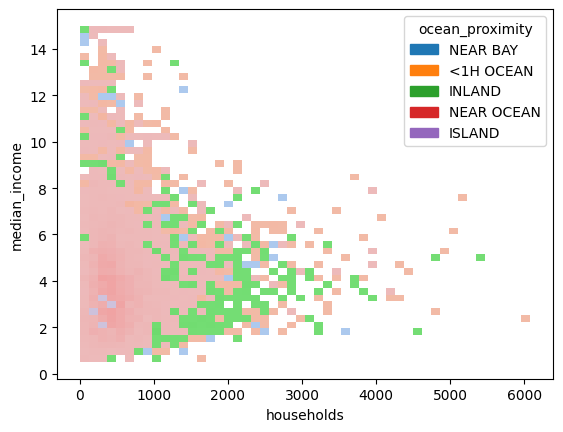

In [97]:
sns.histplot(x=df["households"],y=df["median_income"],bins=50,hue=df["ocean_proximity"])

the household have less median income and more blocks, the people living near less than 1 hour distance from the have less block but more variable incomes.

<Axes: xlabel='ocean_proximity', ylabel='total_rooms'>

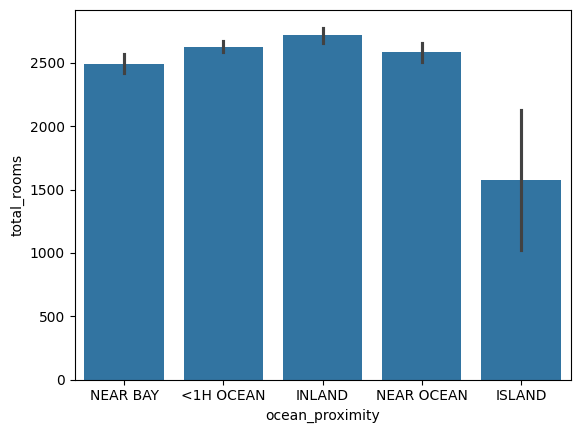

In [98]:
sns.barplot(x=df["ocean_proximity"],y=df["total_rooms"])

<Axes: xlabel='ocean_proximity', ylabel='total_bedrooms'>

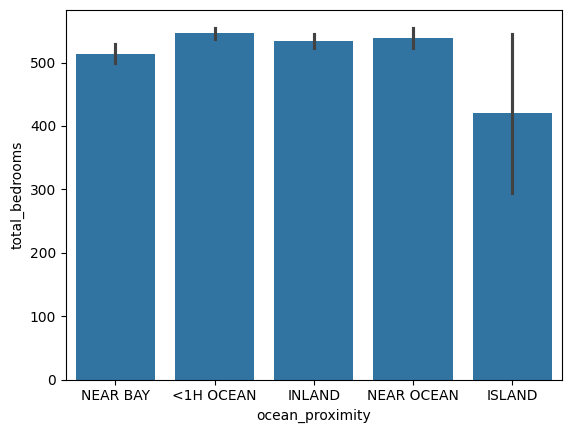

In [99]:
sns.barplot(x=df["ocean_proximity"],y=df["total_bedrooms"])

from this we can say that the number of rooms doesn't have any influence on the value of the block, because almost every locality have same number of bedrooms and bathrooms

<Axes: xlabel='housing_median_age', ylabel='population'>

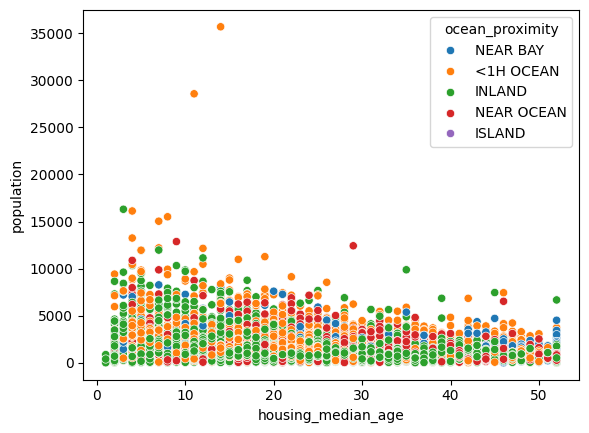

In [100]:
sns.scatterplot(y=df["population"],x=df["housing_median_age"],hue=df["ocean_proximity"],)

we can observe that the people living inland doesn't care about the house age, the people living near the ocean prefer old blocks

<Axes: title={'center': 'population to income ratio'}>

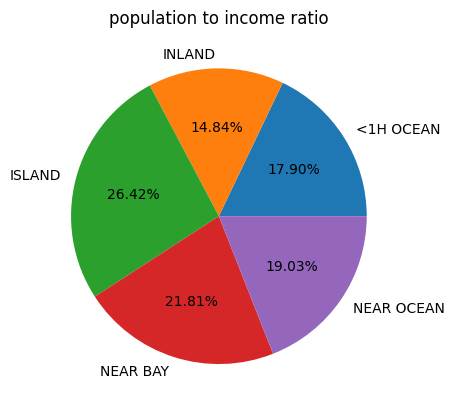

In [101]:
((df["median_income"].groupby(df["ocean_proximity"]).sum()/df["population"].groupby(df["ocean_proximity"]).sum())*100).plot(kind="pie",autopct="%.2f%%",title="population to income ratio")

<Axes: xlabel='latitude', ylabel='Count'>

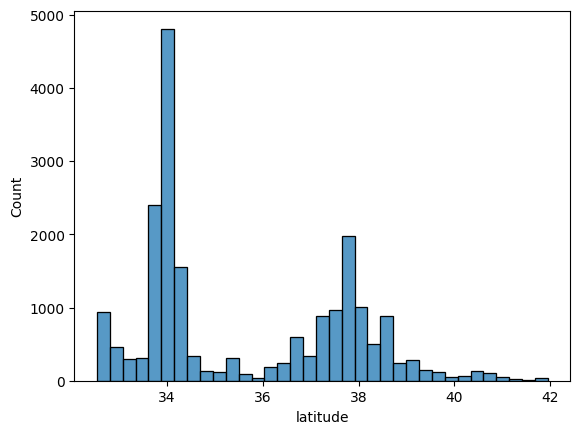

In [127]:
sns.histplot(df["latitude"],)

<Axes: xlabel='ocean_proximity'>

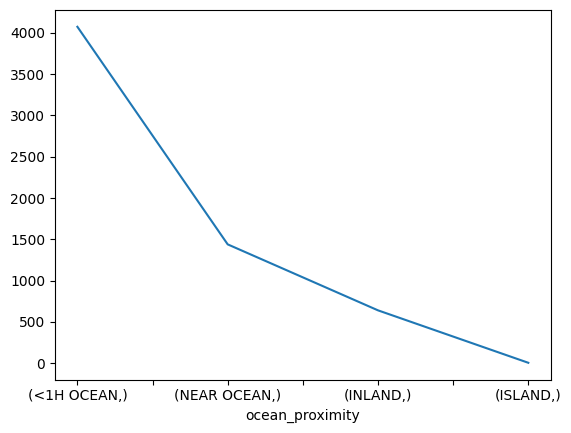

In [113]:
(df.loc[df["latitude"]<34,["ocean_proximity"]]).value_counts().plot()

<Axes: xlabel='ocean_proximity'>

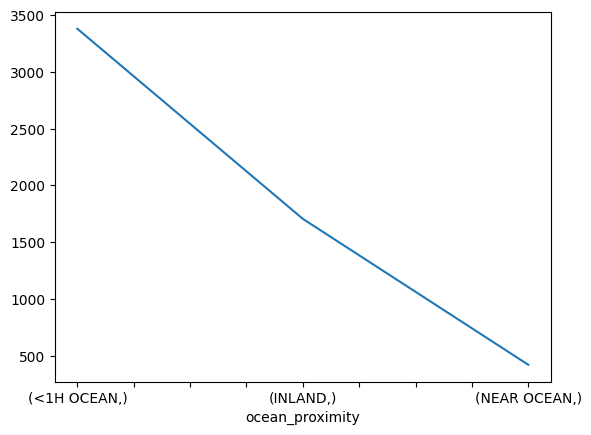

In [114]:
(df.loc[(df["latitude"]>34) & (df["latitude"]<36),["ocean_proximity"]]).value_counts().plot()

<Axes: xlabel='ocean_proximity'>

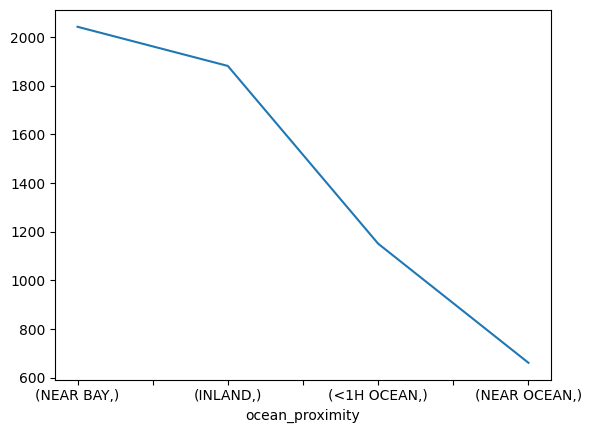

In [115]:
(df.loc[(df["latitude"]>36) & (df["latitude"]<38),["ocean_proximity"]]).value_counts().plot()

<Axes: xlabel='ocean_proximity'>

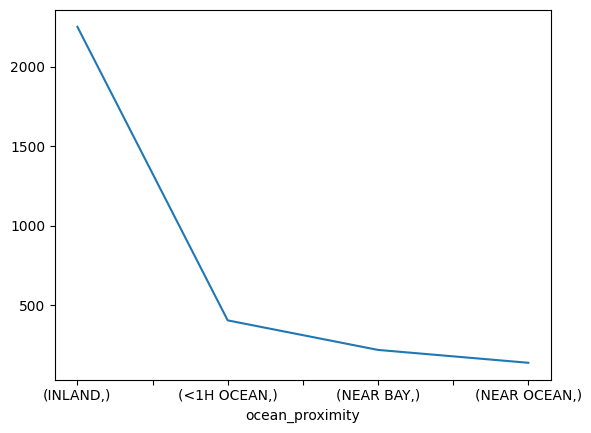

In [117]:
(df.loc[(df["latitude"]>38) & (df["latitude"]<42),["ocean_proximity"]]).value_counts().plot()

In [125]:
df["latitude"].groupby(df["ocean_proximity"]).value_counts()

ocean_proximity  latitude
<1H OCEAN        34.05       189
                 34.06       182
                 34.04       178
                 34.02       173
                 34.03       160
                            ... 
NEAR OCEAN       41.78         1
                 41.81         1
                 41.84         1
                 41.92         1
                 41.95         1
Name: count, Length: 1738, dtype: int64